In [2]:
import zipfile

# Download zip file of images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-09-12 15:08:28--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.207, 142.251.10.207, 142.251.12.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  22.9MB/s    in 5.7s    

2023-09-12 15:08:34 (18.4 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [7]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [38]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")

  return img

Image shape: (382, 512, 3)


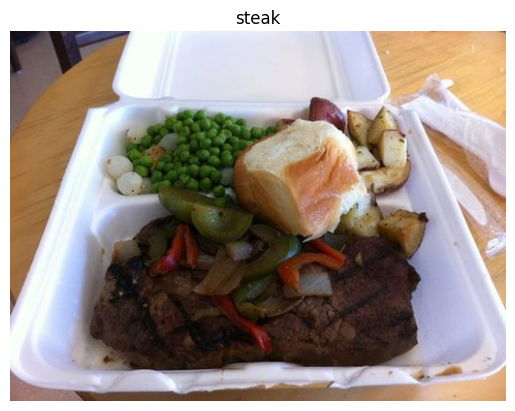

In [19]:
img = view_random_image(target_dir="pizza_steak/train/",target_class="steak")

In [20]:
# View the img
img

array([[[ 16,  11,  18],
        [ 17,  12,  19],
        [ 15,  12,  19],
        ...,
        [132,  90,  66],
        [124,  82,  60],
        [119,  76,  57]],

       [[ 18,  13,  20],
        [ 18,  13,  20],
        [ 16,  13,  20],
        ...,
        [167, 125, 100],
        [156, 111,  88],
        [145, 103,  81]],

       [[ 22,  17,  24],
        [ 21,  16,  23],
        [ 19,  14,  21],
        ...,
        [202, 158, 129],
        [192, 146, 120],
        [183, 139, 112]],

       ...,

       [[148, 106,  94],
        [149, 107,  95],
        [150, 107,  98],
        ...,
        [211, 155, 104],
        [211, 153, 103],
        [210, 152, 102]],

       [[147, 105,  91],
        [148, 106,  92],
        [149, 107,  95],
        ...,
        [211, 153, 103],
        [210, 152, 102],
        [209, 151, 101]],

       [[145, 103,  89],
        [146, 104,  90],
        [146, 104,  92],
        ...,
        [211, 153, 103],
        [210, 152, 102],
        [209, 151, 101]]

In [21]:
# View the image shape
img.shape

(382, 512, 3)

In [22]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.0627451 , 0.04313725, 0.07058824],
        [0.06666667, 0.04705882, 0.0745098 ],
        [0.05882353, 0.04705882, 0.0745098 ],
        ...,
        [0.51764706, 0.35294118, 0.25882353],
        [0.48627451, 0.32156863, 0.23529412],
        [0.46666667, 0.29803922, 0.22352941]],

       [[0.07058824, 0.05098039, 0.07843137],
        [0.07058824, 0.05098039, 0.07843137],
        [0.0627451 , 0.05098039, 0.07843137],
        ...,
        [0.65490196, 0.49019608, 0.39215686],
        [0.61176471, 0.43529412, 0.34509804],
        [0.56862745, 0.40392157, 0.31764706]],

       [[0.08627451, 0.06666667, 0.09411765],
        [0.08235294, 0.0627451 , 0.09019608],
        [0.0745098 , 0.05490196, 0.08235294],
        ...,
        [0.79215686, 0.61960784, 0.50588235],
        [0.75294118, 0.57254902, 0.47058824],
        [0.71764706, 0.54509804, 0.43921569]],

       ...,

       [[0.58039216, 0.41568627, 0.36862745],
        [0.58431373, 0.41960784, 0.37254902],
        [0.58823529, 0

In [23]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


###model-1

In [24]:
# Create a CNN model
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 19s 137ms/step - loss: 0.6117 - accuracy: 0.6527 - val_loss: 0.5410 - val_accuracy: 0.7060
Epoch 2/5
47/47 [==============================] - 6s 138ms/step - loss: 0.4870 - accuracy: 0.7773 - val_loss: 0.4020 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 6s 116ms/step - loss: 0.4450 - accuracy: 0.8040 - val_loss: 0.3785 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 6s 136ms/step - loss: 0.3710 - accuracy: 0.8453 - val_loss: 0.3343 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 6s 118ms/step - loss: 0.2863 - accuracy: 0.8880 - val_loss: 0.3027 - val_accuracy: 0.8580


In [25]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

###model-2

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [27]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [28]:
# Create the model
model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, strides=1,padding='valid',activation='relu', input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 141ms/step - loss: 0.6244 - accuracy: 0.7427 - val_loss: 0.3752 - val_accuracy: 0.8360
Epoch 2/5
47/47 [==============================] - 5s 112ms/step - loss: 0.3911 - accuracy: 0.8353 - val_loss: 0.5187 - val_accuracy: 0.7360
Epoch 3/5
47/47 [==============================] - 7s 138ms/step - loss: 0.3222 - accuracy: 0.8720 - val_loss: 0.3733 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 6s 127ms/step - loss: 0.1904 - accuracy: 0.9367 - val_loss: 0.3714 - val_accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 5s 114ms/step - loss: 0.1083 - accuracy: 0.9680 - val_loss: 0.4137 - val_accuracy: 0.8260


###model-3 (Using Data Augmentation)

**Data augmentation** is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

In [29]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

In [30]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False)

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [31]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

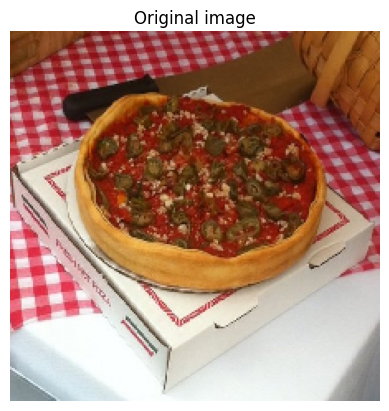

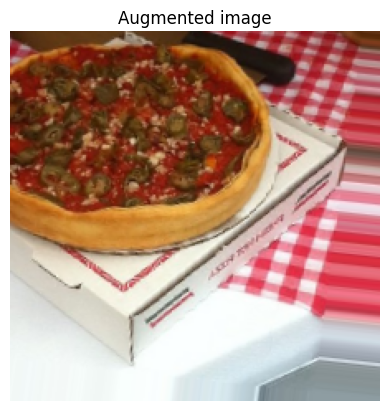

In [125]:
# Show original image and augmented image
random_number = random.randint(0, 31)
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [32]:
model_3 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  tf.keras.layers.MaxPool2D(pool_size=2),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_3 = model_3.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 481ms/step - loss: 0.8068 - accuracy: 0.4773 - val_loss: 0.6925 - val_accuracy: 0.4980
Epoch 2/5
47/47 [==============================] - 20s 432ms/step - loss: 0.6930 - accuracy: 0.4767 - val_loss: 0.6924 - val_accuracy: 0.5160
Epoch 3/5
47/47 [==============================] - 22s 460ms/step - loss: 0.6933 - accuracy: 0.4960 - val_loss: 0.6920 - val_accuracy: 0.5060
Epoch 4/5
47/47 [==============================] - 21s 457ms/step - loss: 0.6926 - accuracy: 0.4953 - val_loss: 0.6911 - val_accuracy: 0.5060
Epoch 5/5
47/47 [==============================] - 20s 435ms/step - loss: 0.6912 - accuracy: 0.5080 - val_loss: 0.6889 - val_accuracy: 0.5520


###model-4

In [33]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 1500 images belonging to 2 classes.


In [34]:
# Create a CNN model
model_4 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_4 = model_4.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 446ms/step - loss: 0.6240 - accuracy: 0.6467 - val_loss: 0.4449 - val_accuracy: 0.7800
Epoch 2/5
47/47 [==============================] - 21s 442ms/step - loss: 0.5190 - accuracy: 0.7487 - val_loss: 0.3878 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 22s 459ms/step - loss: 0.5149 - accuracy: 0.7567 - val_loss: 0.4119 - val_accuracy: 0.8260
Epoch 4/5
47/47 [==============================] - 22s 473ms/step - loss: 0.4665 - accuracy: 0.7860 - val_loss: 0.3577 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 21s 444ms/step - loss: 0.4616 - accuracy: 0.7847 - val_loss: 0.3778 - val_accuracy: 0.8340


In [35]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_11 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_13 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                 

###Making Predictions

In [42]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")

--2023-09-12 15:50:58--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.009s  

2023-09-12 15:50:59 (200 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



In [43]:
steak.shape

(4032, 3024, 3)

In [44]:
def prep_image(filename, img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img/255.
  return img

In [46]:
def pred(model, filename, class_names):
  img = prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[int(tf.round(pred)[0][0])]
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 208ms/step


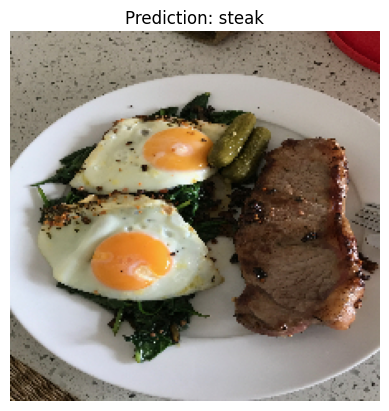

In [48]:
pred(model_4, "03-steak.jpeg", class_names)

In [56]:
!wget https://cdn.suwalls.com/wallpapers/photography/pizza-20201-1920x1080.jpg

--2023-09-12 16:10:18--  https://cdn.suwalls.com/wallpapers/photography/pizza-20201-1920x1080.jpg
Resolving cdn.suwalls.com (cdn.suwalls.com)... 213.174.132.227
Connecting to cdn.suwalls.com (cdn.suwalls.com)|213.174.132.227|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 605453 (591K) [image/jpeg]
Saving to: ‘pizza-20201-1920x1080.jpg’

pizza-20201-1920x10 100%[===================>] 591.26K   515KB/s    in 1.1s    

2023-09-12 16:10:20 (515 KB/s) - ‘pizza-20201-1920x1080.jpg’ saved [605453/605453]



1/1 [==============================] - 0s 21ms/step


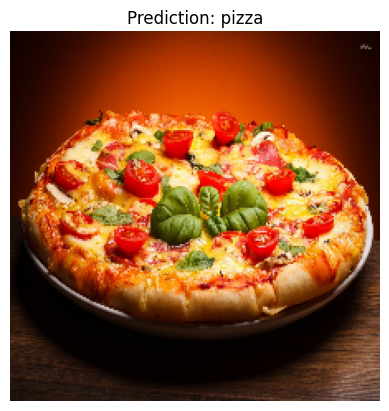

In [59]:
pred(model_4,"pizza-20201-1920x1080.jpg", class_names)